In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
#import stephane.Image_processing.tiff as tiff
import scipy.misc as misc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import PIL.Image as Image
import scipy.ndimage.measurements as meas
import glob
import numpy as np
import stephane.tools.rw_data as rw_data
import stephane.tools.browse as browse
import stephane.display.graphes as graphes
import stephane.display.panel as panel
import stephane.manager.access as access
import stephane.elasticity.processing as proc
import stephane.elasticity.balloon as ball
import scipy
import stephane.hdf5.h5py_s as h5py_s
import glob
import numpy as np
import stephane.tools.rw_data as rw_data
import stephane.tools.browse as browse
import stephane.display.graphes as graphes
import stephane.display.panel as panel
import stephane.manager.access as access
import stephane.Image_processing.cine as cine
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D
#import stephane.Image_processing.tiff as tiff
import scipy.misc as misc
import matplotlib.pyplot as plt
import PIL.Image as Image
import scipy.ndimage.measurements as meas
import stephane.elasticity.processing as proc
import stephane.tools.Smath as Smath
import os.path

ImportError: No module named stephane.tools.rw_data

In [269]:
P1 = ball.pressure(0.006,2*np.pi,20,R0=19)
P0 = 1 #atmospheric pressure in bar

In [38]:
folder = '/Users/stephane/Documents/Postdoc_Princeton/Balloon/Interface_reconstruction/Balloon_backlight_fps10000_4pump12V_ceiling_2_D800minch_breaking_start/'
D_0 = proc.load(folder,step=1)

KeyboardInterrupt: 

In [103]:
D_0['fx'] = 0.1307 #spatial scale, see reference.txt in the date folder
D_0['ft'] = 0.5 #time scale in ms
D_0['D'] = 0.8 * 25.4 #initial diameter in mm

In [17]:
D_0['im'] = np.transpose(D_0['im'],axes=(0,2,1))

In [42]:
D_0['im'] = D_0['im'][...,300:1000]

800

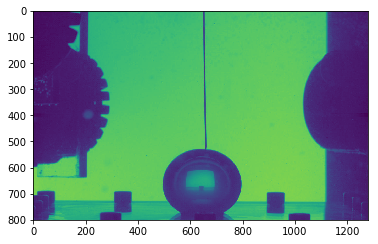

In [21]:
plt.imshow(D_0['im'][0,:,:])
D_0['L']

In [119]:
D_0['im'].shape

(182, 800, 700)

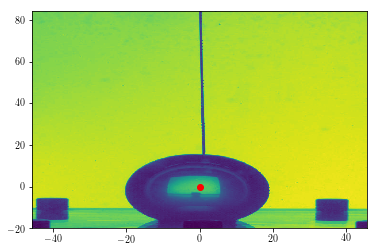

In [52]:
D_0['x']=(np.arange(0,700)-350)*fx
D_0['y']=(np.arange(800,0,-1))*fx-20
#print(D_0['x'].shape,D_0['y'].shape,D_0['im'].shape)
graphes.color_plot(D_0['x'],D_0['y'],D_0['im'][0,...])
graphes.graph([0],[0],label='ro')

In [231]:
N=200
nt=100
X = np.zeros((N,nt))
Y = np.zeros((N,nt))
for i in range(nt):
    print(i)
    X[:,i],Y[:,i] =interface(D_0,i,N=N,rmin=13,rmax=50,display=False)
D_0['X']=X
D_0['Y']=Y

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [164]:
indices=np.where(np.logical_and(dl[:-1]>T,dl[1:]>T))

(array([  9,  87,  98, 150]),)

In [253]:
D_0['X']=X
D_0['Y']=Y

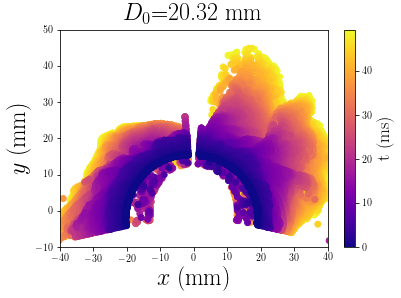

In [260]:
figs={}
nx,ny = X.shape
nt = 100
t = np.arange(nt)*ft
for i,t0 in reversed(list(enumerate(t))):
    xf = X[:,i]
    yf = Y[:,i]
#    for j in range(3):
#        xf,yf = smooth(xf,yf,display=False,T=1.5)
#    plt.scatter(xf,yf,c=[tuple(np.tile([i/100.],3))],cmap='plasma')
    plt.scatter(xf,yf,cmap='plasma',c=np.tile([t0],nx),vmin=0,vmax=max(t))
#plt.axis([])
plt.axis([-40,40,-10,50])
figs.update(graphes.legende('$x$ (mm)','$y$ (mm)','$D_0$='+str(D_0['D'])+' mm',cplot=True))
graphes.colorbar(label='t (ms)')
graphes.save_figs(figs,savedir='./Balloon/Interface_propagation/final',frmt='png')

In [197]:
def smooth(xf,yf,T=2,display=False):
    dl = np.sqrt(np.diff(xf)**2+np.diff(yf)**2)
#graphes.graph(range(nx-1),dl,fignum=2,label='.')
#graphes.set_axis(0,200,0,5)
    indices=np.asarray(np.where(np.logical_and(dl[:-1]>T,dl[1:]>T)))

    xf[indices] = (np.asarray(xf[indices-1])+np.asarray(xf[indices+1]))/2 
    yf[indices] = (np.asarray(yf[indices-1])+np.asarray(yf[indices+1]))/2

    if display:
        plt.scatter(xf,yf,c=[tuple(np.tile([i/50.],3))],cmap='plasma')
    return xf,yf

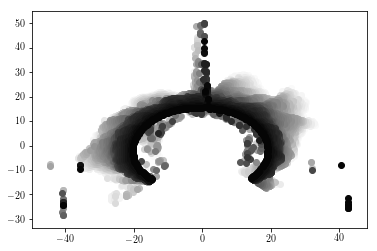

In [149]:
#plt.colorbar()
for i in range(50,0,-1):
    plt.scatter(X[:,i],Y[:,i],c=[tuple(np.tile([i/50.],3))],cmap='plasma',)
    graphes.legende('$x$ (mm)','$y$ (mm)','')
plt.colorbar()
#    plt.scatter(X[:,i],Y[:,i],c=[tuple(np.tile([0.5],3))],cmap='plasma',)

In [ ]:
graphes.graph(X[:,i],Y[:,i],label='.')

In [245]:
t = np.arange(nt)*ft
[R,Theta] = Smath.cart2pol(X,Y)
Rmed = np.median(R,axis=0)
Rmoy = np.mean(R,axis=0)
Rstd = np.std(R,axis=0)

Data not saved


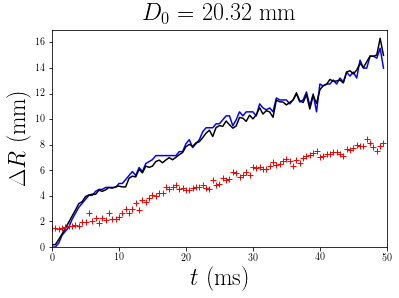

In [261]:
figs = {}
R0 = Rmed[0]
#R0=0
graphes.graph(t,Rmed-R0,label='b')
graphes.graph(t,Rmoy-R0,label='k')
graphes.graph(t,Rstd,label='r+')
graphes.set_axis(0,50,0,17)

figs.update(graphes.legende('$t$ (ms)','$\Delta R$ (mm)','$D_0$ = '+str(D_0['D'])+' mm'))
#figs.update(graphes.legende('$t$ (ms)','$<R^2>$ (mm)','$D_0$ = '+str(D_0['D'])+' mm'))
graphes.save_figs(figs,savedir='./Balloon/Interface_propagation/final')

In [271]:
khi = 5*10**-5 #water compressibility per bar
Vtot = 4.5*4.5*3 #total volume in L
dV1 = Vtot*khi*(P1-P0)*2*np.pi #volume variation in L
dV2 = 4*np.pi*0.2**2*0.04 # volume expansion
print(dV1,dV2)

(0.03918454001062024, 0.02010619298297468)


In [259]:
filename = folder + 'Data_'+os.path.basename(folder[:-1])
print(filename)
h5py_s.example(filename,Dict=D_0,key='D_0')

/Users/stephane/Documents/Postdoc_Princeton/Balloon/Interface_reconstruction/Balloon_backlight_fps10000_4pump12V_ceiling_2_D800minch_breaking_start/Data_Balloon_backlight_fps10000_4pump12V_ceiling_2_D800minch_breaking_start
/Users/stephane/Documents/Postdoc_Princeton/Balloon/Interface_reconstruction/Balloon_backlight_fps10000_4pump12V_ceiling_2_D800minch_breaking_start/Data_Balloon_backlight_fps10000_4pump12V_ceiling_2_D800minch_breaking_start
D_0


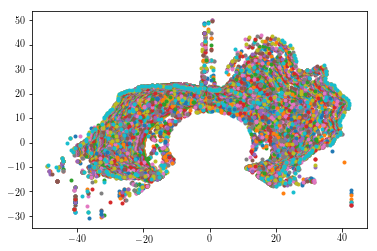

In [123]:
for i in range(100):
    graphes.graph(X[:,i],Y[:,i],label='.')

In [69]:
im0 = D_0['im'][0,...]
np.asarray(np.gradient(im0)).shape

(2, 800, 700)

In [220]:
np.concatenate((np.zeros(5),np.ones(5)))

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.])

In [223]:
def interface(D,i,N=10**3,rmin=10,rmax=30,display=True):
    im0 = D['im'][i,...]
    x = D['x']
    y = D['y']
    X,Y = np.meshgrid(x,y)
    
    theta = np.concatenate((np.linspace(-0.2,np.pi/2-0.1,N/2),np.linspace(np.pi/2+0.1,np.pi+0.2,N/2)))
    
    grad = np.sum(np.asarray(np.gradient(im0))**2,axis=0)
    f = interp.interp2d(x,y,grad)

    nr = 120
    r= np.linspace(rmin,rmax,nr)
    
    R0 = np.zeros(N)
    for i,t in enumerate(theta):
        xi = r*np.cos(t)
        yi = r*np.sin(t)
        p = [f(xx,yy) for xx,yy in zip(xi,yi)]
        R0[i] = r[np.argmax(p)]

    xf = np.asarray(R0*np.cos(theta))
    yf = np.asarray(R0*np.sin(theta))

    if display:
        graphes.color_plot(X,Y,im0)
        graphes.graph(xf,yf,label='r.',fignum=1)
        graphes.graph(np.max(r)*np.cos(theta),np.max(r)*np.sin(theta),label='w--',fignum=1)
        graphes.graph(np.min(r)*np.cos(theta),np.min(r)*np.sin(theta),label='w--',fignum=1)
        plt.colorbar()
        graphes.legende('x (pix)','y (pix)','')
        
    return xf,yf

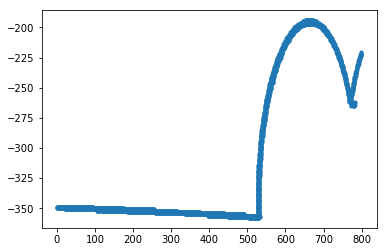

In [25]:
X,Y = proc.interface(D_0,0,T=12)
graphes.graph(Y,-X,label='.')

In [15]:
#estimate of the shear
U_0 = 30 #in m/s
t0 = 10**-3 # shear time in s
nu = 10**-6
delta = np.sqrt(nu*t0)
eta = U_0/(np.sqrt(np.pi)*delta)
print(eta)
print(delta)

535237.234846
3.16227766017e-05
